# Tamer Kanak - 201805069

**Importing Dataset**

In [1]:
import pandas as pd
data = pd.read_csv("moviedata.csv", delimiter=";")

**Usage of the necessary library in order not to receive unnecessary error messages**

In [2]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [3]:
print(data.isnull().sum())

rate            0
red_hist        0
green_hist      0
blue_hist       0
std_pow         0
max_pow         0
min_pow         0
mean_pow        0
max_pow_freq    0
max_pow_time    0
band5           0
band10          0
band15          0
band20          0
band25          0
band30          0
band35          0
band40          0
band45          0
band50          0
band55          0
band60          0
band65          0
band70          0
band75          0
band80          0
band85          0
band90          0
band95          0
band100         0
band105         0
band110         0
band115         0
band120         0
band_last       0
dtype: int64


**Preprocessing of hist columns**

In [4]:
# Remove parentheses
data["red_hist"] = data["red_hist"].str.replace('[', '').str.replace(']', '')
data["green_hist"] = data["green_hist"].str.replace('[', '').str.replace(']', '')
data["blue_hist"] = data["blue_hist"].str.replace('[', '').str.replace(']', '')

# Division by spaces
data["red_hist"] = data["red_hist"].str.split()
data["green_hist"] = data["green_hist"].str.split()
data["blue_hist"] = data["blue_hist"].str.split()

# Convert values to numeric
data["red_hist"] = [list(map(float, x)) for x in data["red_hist"]]
data["green_hist"] = [list(map(float, x)) for x in data["green_hist"]]
data["blue_hist"] = [list(map(float, x)) for x in data["blue_hist"]]

In [5]:
data.head()

,rate,red_hist,green_hist,blue_hist,std_pow,max_pow,min_pow,mean_pow,max_pow_freq,max_pow_time,...,band80,band85,band90,band95,band100,band105,band110,band115,band120,band_last
0,4.7,"[24711.5556, 1613.02778, 760.157407, 689.44444...","[23884.8611, 1164.0, 637.972222, 676.398148, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","3,67E+10",0.0008161678518268867,0.0,"2,39E+08",34.453.125,48.561.632.653.061.200,...,"5,11E+05","1,93E+06","1,24E+06","2,74E+05","1,44E+03","1,99E+02","1,69E+02","1,59E+02","1,53E+01","1,49E+02"
1,7.2,"[27845.8435, 3619.25217, 2938.4, 1592.2087, 12...","[28550.3565, 1578.50435, 1581.26087, 1400.2347...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","7,85E+09",0.0024496417709396487,0.0,"4,16E+09",172.265.625,0.15528344671201813,...,"1,15E+08","8,77E+06","5,44E+06","1,36E+06","6,31E+03","3,85E+02","2,43E+02","1,99E+03","1,76E+03","1,64E+03"
2,7.8,"[23391.3418, 1366.52532, 638.291139, 830.38607...","[22967.6013, 422.291139, 218.778481, 354.14557...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","4,88E+09",0.000683430285411676,0.0,"5,18E+08",172.265.625,9.699.845.804.988.660,...,"5,43E+06","3,12E+06","1,25E+07","2,14E+06","1,02E+04","1,53E+03","1,33E+02","1,27E+03","1,23E+03","1,20E+03"
3,7.1,"[20288.05479452, 1980.80821918, 552.99315068, ...","[20563.0137, 1795.03425, 471.335616, 384.37671...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","3,20E+10",0.0005008352583673668,0.0,"2,97E+09",172.265.625,7.513.687.074.829.930,...,"2,64E+06","2,07E+07","1,66E+06","1,02E+07","4,25E+03","1,11E+03","3,23E+01","2,56E+02","2,35E+01","2,24E+02"
4,7.5,"[22906.2034, 1235.41808, 831.40678, 896.559322...","[25071.0847, 703.59322, 547.485876, 542.259887...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","3,72E+10",0.0017574637372294911,0.0,"2,79E+08",172.265.625,11.732.607.709.750.500,...,"3,95E+06","2,43E+07","1,73E+07","5,42E+05","3,55E+04","1,08E+03","5,96E+01","5,08E+01","4,69E+01","4,46E+02"


In [6]:
selectedColumns = ["min_pow", "rate", "max_pow", "max_pow_freq", "max_pow_time", "red_hist", "green_hist", "blue_hist"]

print(data.info())

for col in data: 
    if col not in selectedColumns:
        print(col)
        data[col] = data[col].str.replace(',', '.')
        data[col] = [float(x) for x in data[col]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rate          148 non-null    float64
 1   red_hist      148 non-null    object 
 2   green_hist    148 non-null    object 
 3   blue_hist     148 non-null    object 
 4   std_pow       148 non-null    object 
 5   max_pow       148 non-null    object 
 6   min_pow       148 non-null    float64
 7   mean_pow      148 non-null    object 
 8   max_pow_freq  148 non-null    object 
 9   max_pow_time  148 non-null    object 
 10  band5         148 non-null    object 
 11  band10        148 non-null    object 
 12  band15        148 non-null    object 
 13  band20        148 non-null    object 
 14  band25        148 non-null    object 
 15  band30        148 non-null    object 
 16  band35        148 non-null    object 
 17  band40        148 non-null    object 
 18  band45        148 non-null    

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rate          148 non-null    float64
 1   red_hist      148 non-null    object 
 2   green_hist    148 non-null    object 
 3   blue_hist     148 non-null    object 
 4   std_pow       148 non-null    float64
 5   max_pow       148 non-null    object 
 6   min_pow       148 non-null    float64
 7   mean_pow      148 non-null    float64
 8   max_pow_freq  148 non-null    object 
 9   max_pow_time  148 non-null    object 
 10  band5         148 non-null    float64
 11  band10        148 non-null    float64
 12  band15        148 non-null    float64
 13  band20        148 non-null    float64
 14  band25        148 non-null    float64
 15  band30        148 non-null    float64
 16  band35        148 non-null    float64
 17  band40        148 non-null    float64
 18  band45        148 non-null    

In [8]:
data.head()

,rate,red_hist,green_hist,blue_hist,std_pow,max_pow,min_pow,mean_pow,max_pow_freq,max_pow_time,...,band80,band85,band90,band95,band100,band105,band110,band115,band120,band_last
0,4.7,"[24711.5556, 1613.02778, 760.157407, 689.44444...","[23884.8611, 1164.0, 637.972222, 676.398148, 5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.670000e+10,0.0008161678518268867,0.0,2.390000e+08,34.453.125,48.561.632.653.061.200,...,511000.0,1930000.0,1240000.0,274000.0,1440.0,199.0,169.0,159.0,15.3,149.0
1,7.2,"[27845.8435, 3619.25217, 2938.4, 1592.2087, 12...","[28550.3565, 1578.50435, 1581.26087, 1400.2347...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7.850000e+09,0.0024496417709396487,0.0,4.160000e+09,172.265.625,0.15528344671201813,...,115000000.0,8770000.0,5440000.0,1360000.0,6310.0,385.0,243.0,1990.0,1760.0,1640.0
2,7.8,"[23391.3418, 1366.52532, 638.291139, 830.38607...","[22967.6013, 422.291139, 218.778481, 354.14557...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.880000e+09,0.000683430285411676,0.0,5.180000e+08,172.265.625,9.699.845.804.988.660,...,5430000.0,3120000.0,12500000.0,2140000.0,10200.0,1530.0,133.0,1270.0,1230.0,1200.0
3,7.1,"[20288.05479452, 1980.80821918, 552.99315068, ...","[20563.0137, 1795.03425, 471.335616, 384.37671...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.200000e+10,0.0005008352583673668,0.0,2.970000e+09,172.265.625,7.513.687.074.829.930,...,2640000.0,20700000.0,1660000.0,10200000.0,4250.0,1110.0,32.3,256.0,23.5,224.0
4,7.5,"[22906.2034, 1235.41808, 831.40678, 896.559322...","[25071.0847, 703.59322, 547.485876, 542.259887...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.720000e+10,0.0017574637372294911,0.0,2.790000e+08,172.265.625,11.732.607.709.750.500,...,3950000.0,24300000.0,17300000.0,542000.0,35500.0,1080.0,59.6,50.8,46.9,446.0


In [9]:
# Convert commas in each column to periods
data["max_pow"] = data["max_pow"].str.replace(",", ".")
data["max_pow"] = pd.to_numeric(data["max_pow"], errors='coerce')

data["max_pow_freq"] = data["max_pow_freq"].str.replace(".", "")
data["max_pow_freq"] = data["max_pow_freq"].astype(float)

data["max_pow_time"] = [value.replace(".", "") if not value.startswith('0') else value for value in data["max_pow_time"]]
data["max_pow_time"] = data["max_pow_time"].astype(float)

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rate          148 non-null    float64
 1   red_hist      148 non-null    object 
 2   green_hist    148 non-null    object 
 3   blue_hist     148 non-null    object 
 4   std_pow       148 non-null    float64
 5   max_pow       148 non-null    float64
 6   min_pow       148 non-null    float64
 7   mean_pow      148 non-null    float64
 8   max_pow_freq  148 non-null    float64
 9   max_pow_time  148 non-null    float64
 10  band5         148 non-null    float64
 11  band10        148 non-null    float64
 12  band15        148 non-null    float64
 13  band20        148 non-null    float64
 14  band25        148 non-null    float64
 15  band30        148 non-null    float64
 16  band35        148 non-null    float64
 17  band40        148 non-null    float64
 18  band45        148 non-null    

**Dropping min_pow and blue_hist columns because they consist of only 0 values**

In [11]:
data.drop(columns=["min_pow","blue_hist"], inplace=True)

**256 value in red_hist column converted to column**

In [12]:
# red_hist Column
down_sample_df_red = []

for row in range(len(data["red_hist"])):
    down_sample = []
    
    for pixel in range(0, len(data["red_hist"][0]), 1):
        mini_pixel = data["red_hist"][row][pixel]
        down_sample.append(mini_pixel)
        
    down_sample_df_red.append(down_sample)
    
down_sample_df_red = pd.DataFrame(down_sample_df_red)

In [13]:
# Rename the columns
new_column_names = []
for i in range(1, len(down_sample_df_red.columns) + 1):
  new_column_names.append("red_hist_" + str(i))

down_sample_df_red.columns = new_column_names

In [14]:
data.drop("red_hist", axis=1, inplace=True)
data = pd.concat([data, down_sample_df_red], axis=1)

**256 value in green_hist column converted to column**

In [15]:
# green_hist Column
down_sample_df_green = []

for row in range(len(data["green_hist"])):
    down_sample = []
    
    for pixel in range(0, len(data["green_hist"][0]), 1):
        mini_pixel = data["green_hist"][row][pixel]
        down_sample.append(mini_pixel)
        
    down_sample_df_green.append(down_sample)
    
down_sample_df_green = pd.DataFrame(down_sample_df_green)

In [16]:
# Rename the columns
new_column_names = []
for i in range(1, len(down_sample_df_green.columns) + 1):
  new_column_names.append("green_hist_" + str(i))
down_sample_df_green.columns = new_column_names

In [17]:
data.drop("green_hist", axis=1, inplace=True)
data = pd.concat([data, down_sample_df_green], axis=1)

**The process of determining the position of the red_hist values**

In [18]:
print(data.iloc[:, 31:287])

       red_hist_1   red_hist_2   red_hist_3   red_hist_4   red_hist_5  \
0    24711.555600  1613.027780   760.157407   689.444444   593.250000   
1    27845.843500  3619.252170  2938.400000  1592.208700  1209.460870   
2    23391.341800  1366.525320   638.291139   830.386076   873.310127   
3    20288.054795  1980.808219   552.993151   394.705479   581.000000   
4    22906.203400  1235.418080   831.406780   896.559322   923.881356   
..            ...          ...          ...          ...          ...   
143  23126.113821   990.560976   605.105691   719.219512   942.170732   
144  20995.070100   609.573248   435.394904   576.789809   652.152866   
145  22123.363000  1632.562960  1935.851850  2046.614810  2095.703700   
146  12304.457400  1586.132980  1013.659570  1092.074470   956.159574   
147  19882.932000  1123.306120   501.877551   718.489796   929.537415   

      red_hist_6   red_hist_7   red_hist_8   red_hist_9  red_hist_10  ...  \
0     532.027778   576.027778   530.564815   6

**The process of determining the position of the green_hist values**

In [19]:
print(data.iloc[:, 287:543])

     green_hist_1  green_hist_2  green_hist_3  green_hist_4  green_hist_5  \
0    23884.861100   1164.000000    637.972222    676.398148    525.888889   
1    28550.356500   1578.504350   1581.260870   1400.234780   1050.069570   
2    22967.601300    422.291139    218.778481    354.145570    394.651899   
3    20563.013700   1795.034250    471.335616    384.376712    478.513699   
4    25071.084700    703.593220    547.485876    542.259887    698.028249   
..            ...           ...           ...           ...           ...   
143  22654.626016   1361.520325   1353.691057    973.504065    831.211382   
144  23492.675200    427.229299    463.063694    264.917197    291.191083   
145  25859.192600    698.600000    826.755556   1698.525930   1990.044440   
146  13232.638300   1653.478720   1289.303190   1214.441490   1055.148940   
147  19952.966000    737.353741    379.353741    999.448980    883.952381   

     green_hist_6  green_hist_7  green_hist_8  green_hist_9  green_hist_10 

**Find the one with the maximum value every 16 elements**

In [20]:
def get_max_in_group(hist):
    max_values = []
    for i in range(0, len(hist), 16):
        max_values.append(max(hist[i:i+16]))
    return max_values

**Get the ones with the maximum value every 16 elements**

In [21]:
def filter_max_values(hist):
    max_values = get_max_in_group(hist)
    filtered_hist = [max_values[i//16] for i in range(len(hist))]
    return filtered_hist

**Find the maximum value every 16 elements**

In [22]:
import numpy as np

# Get histogram data separately
red_hist = data.iloc[:, 31:287].values
green_hist = data.iloc[:, 287:543].values

# Get the ones with the maximum value every 16 elements (for red_hist)
filtered_red_hist = np.array([filter_max_values(hist) for hist in red_hist])

# Get the ones with the maximum value every 16 elements (for green_hist)
filtered_green_hist = np.array([filter_max_values(hist) for hist in green_hist])

In [23]:
red_df = pd.DataFrame(filtered_red_hist[:, ::16])
green_df = pd.DataFrame(filtered_green_hist[:, ::16])

red_columns = [f"red_df_{i}" for i in range(1, 17)]
green_columns = [f"green_df_{i}" for i in range(1, 17)]

**Determining in which column the green_hist and red_hist values are to remove the old version from the data set**

In [24]:
print(data.columns[31:543])

Index(['red_hist_1', 'red_hist_2', 'red_hist_3', 'red_hist_4', 'red_hist_5',
       'red_hist_6', 'red_hist_7', 'red_hist_8', 'red_hist_9', 'red_hist_10',
       ...
       'green_hist_247', 'green_hist_248', 'green_hist_249', 'green_hist_250',
       'green_hist_251', 'green_hist_252', 'green_hist_253', 'green_hist_254',
       'green_hist_255', 'green_hist_256'],
      dtype='object', length=512)


**Dropping the old green_hist and red_hist columns and adding the maximised columns to the dataset**

In [25]:
# Set the column names
red_df.columns = red_columns
green_df.columns = green_columns

data.drop(data.columns[31:543], axis=1, inplace=True)
data = pd.concat([data, red_df, green_df], axis=1)

**Defining variables for finding mean, max and min values of band values**

In [26]:
import numpy as np
# Create a list to store the values for the new column
bandMean = []
bandMax = []
bandMin = []

**Finding the mean, max and min values of each 25 elements**

In [27]:
# For each row
for i in range(len(data)):
  # Calculate the average of every 5 elements
  for j in range(0, 25, 5):
      average = sum(data.iloc[i, 6:31][j:j+5]) / 5
      maxBand = max(data.iloc[i, 6:31][j:j+5])
      minBand = min(data.iloc[i, 6:31][j:j+5])
      # Append the average to the list of new column values
      bandMean.append(average)
      bandMax.append(maxBand)
      bandMin.append(minBand)

**Converting the found values into dataframes to be added to the dataframe**

In [28]:
# Converting list every 5 elements into a row
num_rows = len(bandMean) // 5

bandMeanDf = np.array(bandMean[:num_rows * 5]).reshape(num_rows, 5)
bandMeanDf = pd.DataFrame(bandMeanDf)

bandMaxDf = np.array(bandMax[:num_rows * 5]).reshape(num_rows, 5)
bandMaxDf = pd.DataFrame(bandMaxDf)

bandMinDf = np.array(bandMin[:num_rows * 5]).reshape(num_rows, 5)
bandMinDf = pd.DataFrame(bandMinDf)

**Assigning column names to mean, max and min dataframes found for the band**

In [29]:
# Rename the columns
bandMeanName = []
bandMaxName = []
bandMinName = []
for i in range(25, 126, 25):
  bandMeanName.append("band_"+ str(i) + " mean")
  bandMaxName.append("band_"+ str(i) + " max")
  bandMinName.append("band_"+ str(i) + " min")

**Assigning column names, dropping old columns and adding new columns**

In [30]:
bandMeanDf.columns = bandMeanName
bandMaxDf.columns = bandMaxName
bandMinDf.columns = bandMinName

data = data.drop(data.columns[6:31], axis=1)

# Concatenating
data = pd.concat([data.iloc[:,:6], bandMeanDf, bandMaxDf, bandMinDf,data.iloc[:,6:]], axis=1)

In [31]:
print(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rate           148 non-null    float64
 1   std_pow        148 non-null    float64
 2   max_pow        148 non-null    float64
 3   mean_pow       148 non-null    float64
 4   max_pow_freq   148 non-null    float64
 5   max_pow_time   148 non-null    float64
 6   band_25 mean   148 non-null    float64
 7   band_50 mean   148 non-null    float64
 8   band_75 mean   148 non-null    float64
 9   band_100 mean  148 non-null    float64
 10  band_125 mean  148 non-null    float64
 11  band_25 max    148 non-null    float64
 12  band_50 max    148 non-null    float64
 13  band_75 max    148 non-null    float64
 14  band_100 max   148 non-null    float64
 15  band_125 max   148 non-null    float64
 16  band_25 min    148 non-null    float64
 17  band_50 min    148 non-null    float64
 18  band_75 mi

**Creation of correlation matrix**

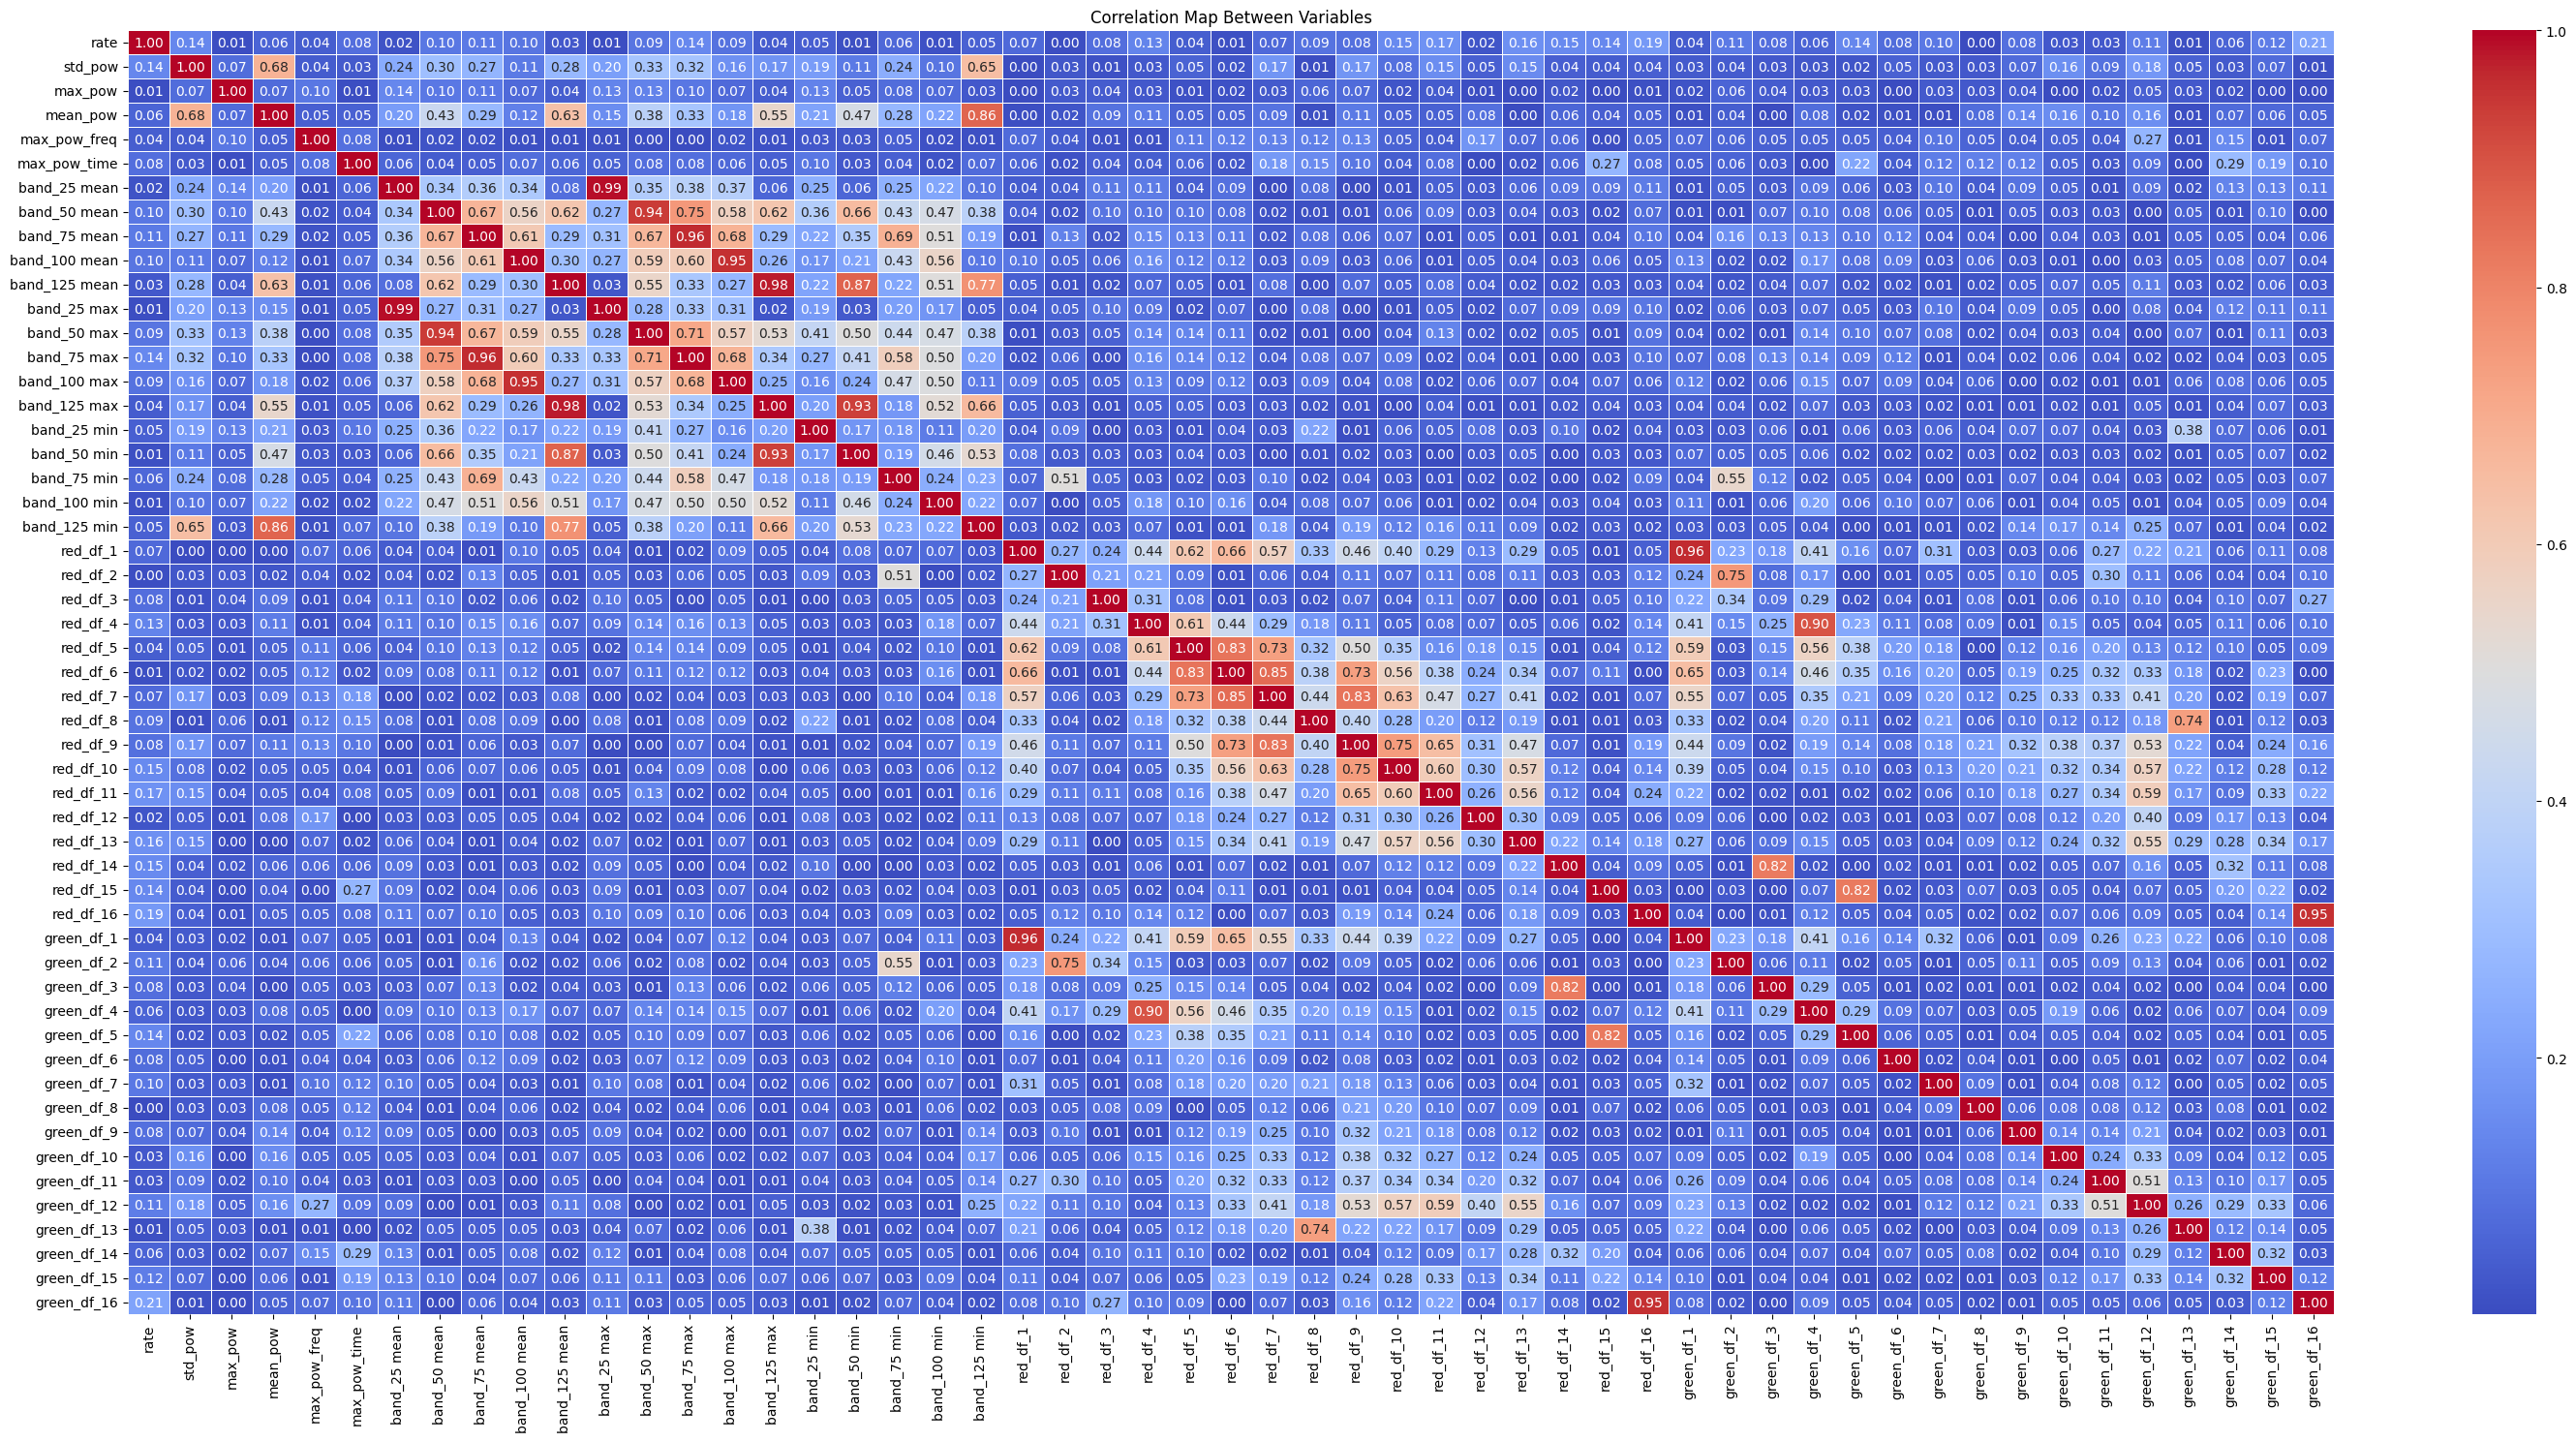

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_max = data.corr().abs()

# Visualise the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(corr_max, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map Between Variables')
plt.tight_layout()
plt.show()

**Average change of Red and Green values**

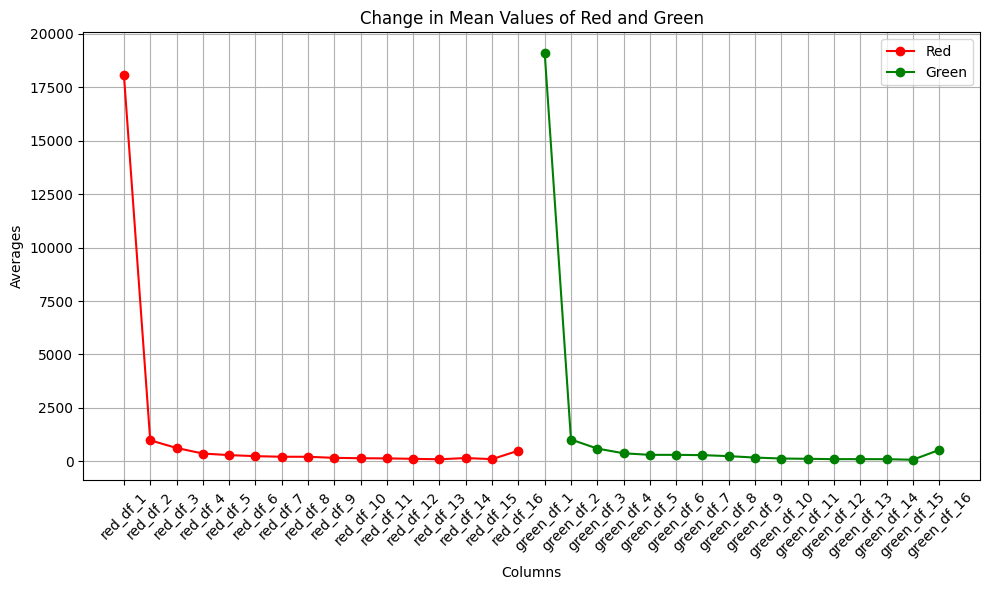

In [33]:
column_means_red = data.iloc[:,21:37].mean()
column_means_green = data.iloc[:,37:].mean()

# Let's draw the line graph
plt.figure(figsize=(10, 6))

plt.plot(column_means_red.index, column_means_red.values, marker='o', linestyle='-', color='red', label='Red')
plt.plot(column_means_green.index, column_means_green.values, marker='o', linestyle='-', color='green', label='Green')

plt.xlabel('Columns')
plt.ylabel('Averages')
plt.title('Change in Mean Values of Red and Green')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Separate features and target variable**

In [34]:
X = data.drop("rate", axis=1)
y = data["rate"]

**Train and Test Split & Scaling**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Removing unnecessary columns by coefficient using LassoCV**

In [36]:
from sklearn.linear_model import LassoCV

# Let's build a model and apply Lasso Regression
lasso = LassoCV(cv=50)
lasso.fit(X_train, y_train)

# Let's show the feature coefficients
print("Feature Coefficients:")
for i, coef in enumerate(lasso.coef_):
    print(f"Feature {i+1}: {coef}")

Feature Coefficients:
Feature 1: -0.3816008217029351
Feature 2: -0.19437698561769073
Feature 3: 0.0
Feature 4: -0.0
Feature 5: -0.0
Feature 6: 0.0
Feature 7: -0.0
Feature 8: -0.0
Feature 9: -0.0
Feature 10: -0.0
Feature 11: 0.0
Feature 12: -0.0
Feature 13: -0.0
Feature 14: -0.0
Feature 15: -0.0
Feature 16: 0.0
Feature 17: -0.1384721248189296
Feature 18: -0.0
Feature 19: 0.0
Feature 20: -0.1305130935823595
Feature 21: 0.0
Feature 22: -0.0
Feature 23: -0.0
Feature 24: 0.0
Feature 25: -0.10642861582502039
Feature 26: -0.0
Feature 27: -0.0
Feature 28: 0.0
Feature 29: -0.0
Feature 30: -0.1009708720700833
Feature 31: -0.0
Feature 32: 0.0
Feature 33: -0.0
Feature 34: -0.12515665487082267
Feature 35: 0.0
Feature 36: -0.0
Feature 37: 0.0
Feature 38: -0.08136841064815929
Feature 39: -0.0
Feature 40: 0.0
Feature 41: -0.0
Feature 42: 0.0
Feature 43: 0.0
Feature 44: 0.0
Feature 45: 0.0
Feature 46: -0.0
Feature 47: 0.0
Feature 48: -0.0
Feature 49: 0.0
Feature 50: -0.0
Feature 51: -0.0
Feature 52: -0

**Eliminating the features based on the coefficients produced by LassoCV and performing the scale operation again**

In [37]:
selected_columns = [0,1,16,19,24,29,33,37,51]
X = X.iloc[:,selected_columns]
y = data["rate"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)    

**Installing the required algorithm**

In [38]:
!pip install xgboost

   ---------------------------------------- 125.4/125.4 MB 6.1 MB/s eta 0:00:00


**Importing the necessary regression algorithms**

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Bayesian Regression": BayesianRidge(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "KNN Regression": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor()
}

**Model training with Cross Validation and measurement of success metrics**

In [40]:
for name, regressor in regressors.items():
    
    regressor.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate R-squared scores for both training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the model name, train R-squared, and test R-squared scores
    print(f"{name.upper()}:")
    print(f"Train R-Squared Score: {train_r2:.6f}")
    print(f"Test R-Squared Score: {test_r2:.6f}\n")
    
    print(name.upper())
    scores = cross_validate(regressor, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)
    scores = pd.DataFrame(scores, index=range(1,11))
        
    print(scores.iloc[:, 2:].mean().abs().apply("{:.6f}".format))
    
    print("_______________________________________________________________________")

LINEAR REGRESSION:
Train R-Squared Score: 0.260048
Test R-Squared Score: -9.229334

LINEAR REGRESSION
test_r2                                     0.441633
train_r2                                    0.265003
test_neg_mean_absolute_error                1.997067
train_neg_mean_absolute_error               1.710469
test_neg_mean_squared_error                 6.036796
train_neg_mean_squared_error                4.183550
test_neg_root_mean_squared_error            2.385209
train_neg_root_mean_squared_error           2.045034
test_neg_mean_absolute_percentage_error     0.598289
train_neg_mean_absolute_percentage_error    0.484053
dtype: object
_______________________________________________________________________
RIDGE REGRESSION:
Train R-Squared Score: 0.260033
Test R-Squared Score: -9.123524

RIDGE REGRESSION
test_r2                                     0.394545
train_r2                                    0.264955
test_neg_mean_absolute_error                1.985694
train_neg_mean_absolute